# Project Notebook

## 25.12.2019
### Data Processing

- Created a custom data transformer to transform Shapefile annotations of dataset into COCO format for compatible use with Detectron2.

- There is misalignement in the dataset images and corresponding annotations. For now the conversion from GIS latitude and longitude coordinates to pixel coordinates has been hardcoded, but should be dealt with to correct alignment.

- Segment classification has been preserved, but can be modified to restrict segmentation to a single class (i.e. tree) initially as apposed to tree types.

## 02.01.2019
### Data Processing

- The misalignment has now been corrected for, by dynamically using GIS libraries.
- This custom data loader also supports multiple datasets (all within a main dataset directory), but for single orthographic images.
- These single annotated orthographic images still need to be cut up into fixed sized samples.

In [1]:
# define path to visualize COCO transformed dataset
dataset_path = "/Users/Ro/Google Drive/UBC_EngCapstone/sample_data/CPT2a-n"

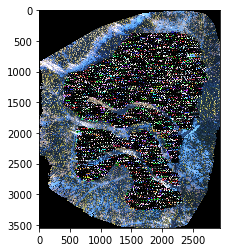

In [2]:
import detectron2
from detectron2.utils.visualizer import Visualizer
import cv2
from data_processing.register_shapefile_datatset import get_dataset_dicts
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt

classes, dataset_dicts = get_dataset_dicts(dataset_path)
img = cv2.imread(dataset_path+'/CPT2a-n_ortho-resample.tif')
visualizer = Visualizer(img[:, :, :], metadata=MetadataCatalog.get("CPT2a-n"), scale=1)
vis = visualizer.draw_dataset_dict(dataset_dicts[0])
plt.imshow(vis.get_image()[:, :, ::-1])
plt.show()